In [67]:
import pandas as pd
import numpy as np
import pydicom 
import os
import matplotlib.pyplot as plt

from skimage.measure import label,regionprops
from skimage.segmentation import clear_border

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [22]:
train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [5]:
def load_scans(path):
    slices = [pydicom.dcmread(path + '/' + file) for file in os.listdir(path)]
    slices.sort(key = lambda x : float(x.ImagePositionPatient[2]))
    return slices

In [16]:
example = 'train/' + train['Patient'][0]

(-0.5, 511.5, 511.5, -0.5)

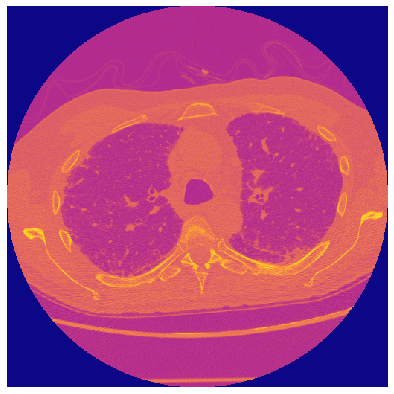

In [54]:
plt.figure(figsize=(7,7))
plt.imshow(load_scans(example)[19].pixel_array, cmap='plasma')
plt.axis('off')

In [56]:
example_img = load_scans(example)[19].pixel_array

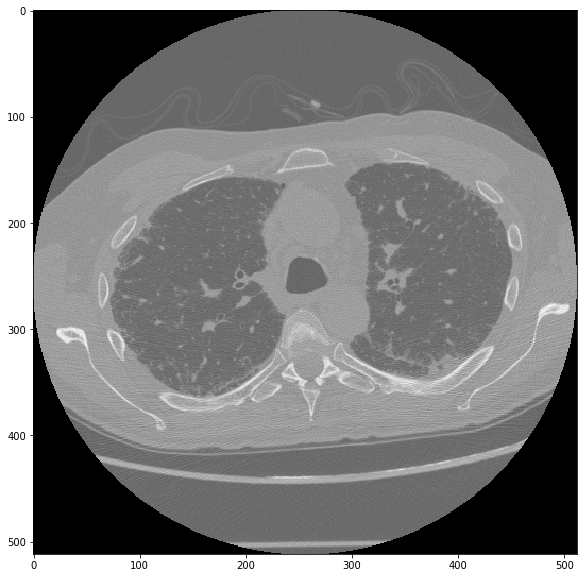

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(example_img, cmap='gray')

Text(0.5, 1.0, 'Binary Mask Image')

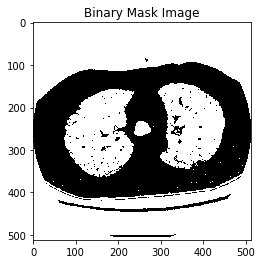

In [82]:
img = (example_img + load_scans(example)[19].RescaleIntercept) / load_scans(example)[19].RescaleSlope
img = img < -400 #HU unit range for lungs CT SCAN

plt.imshow(img, cmap='gray')
plt.title('Binary Mask Image')

In [83]:
img = clear_border(img)

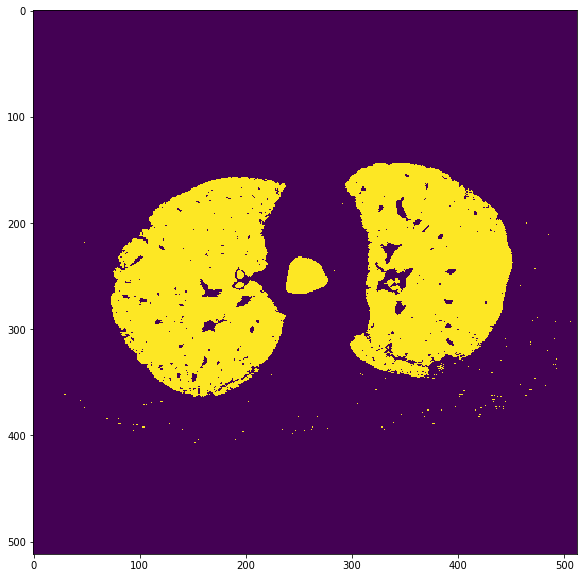

In [84]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(img)

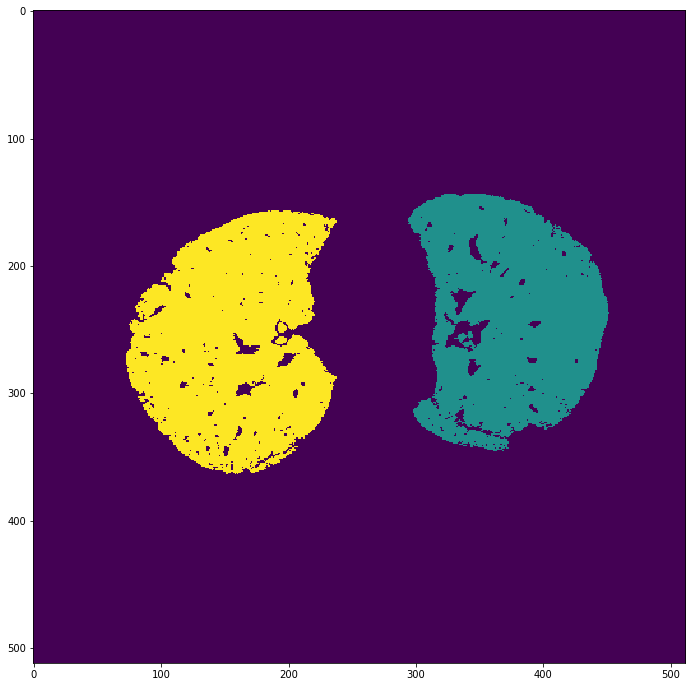

In [97]:
img = label(img)

fig = plt.figure(figsize=(12, 12))

plt.imshow(img)

In [98]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
regionprops(img)

In [89]:
areas = [r.area for r in regionprops(img)]
areas.sort()
if len(areas) > 2:
    for region in regionprops(img):
        if region.area < areas[-2]:
            for coordinates in region.coords:                
                img[coordinates[0], coordinates[1]] = 0
img = img > 0

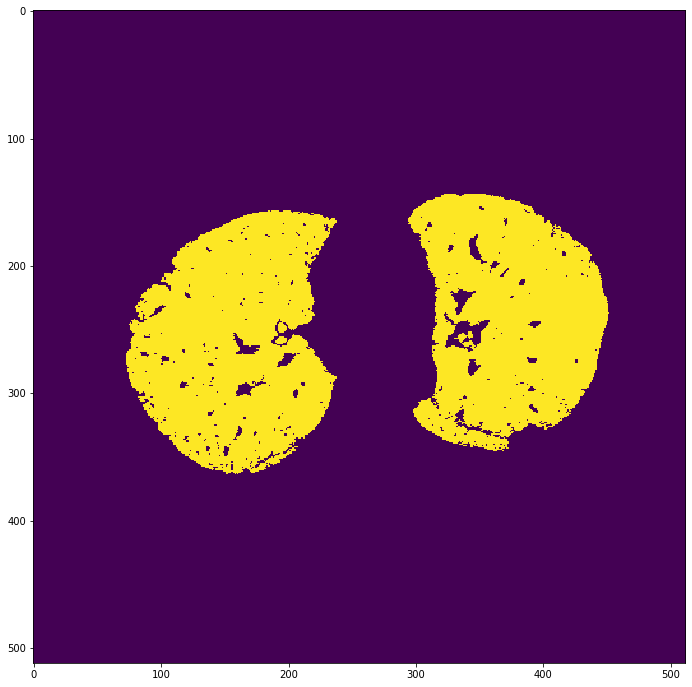

In [91]:
fig = plt.figure(figsize=(12, 12))

plt.imshow(img)